<a href="https://colab.research.google.com/github/Prasang-Biyani/Loan-Disbursement/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#```Loan Disbursement Company```

Company offers innovative loans to help millennials achieve a life that they desire. We differentiate in otherwise cluttered Personal Loan segment and deliver fastest Personal Loans at customer friendly terms.

#```Problem Statement```

Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [ ]:
df = pd.read_csv()

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
df.shape

(396030, 27)

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

##<font color="red" face='georgia'>Features Description</font>

Dataset consists of 396030 data points with 27 features. 

Following are the description of features:

1. loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
2. term : The number of payments on the loan. Values are in months and can be either 36 or 60.
3. int_rate : Interest Rate on the loan
4. installment : The monthly payment owed by the borrower if the loan originates.
5. grade : Company assigned loan grade
6. sub_grade : Company assigned loan subgrade
7. emp_title :The job title supplied by the Borrower when applying for the loan.*
8. emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
9. home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.
10. annual_inc : The self-reported annual income provided by the borrower during registration.
11. verification_status : Indicates if income was verified by Company, not verified, or if the income source was verified
12. issue_d : The month which the loan was funded
13. loan_status : Current status of the loan - Target Variable
14. purpose : A category provided by the borrower for the loan request.
15. title : The loan title provided by the borrower
16. dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested Company loan, divided by the borrower’s self-reported monthly income.
17. earliest_cr_line :The month the borrower's earliest reported credit line was opened
18. open_acc : The number of open credit lines in the borrower's credit file.
19. pub_rec : Number of derogatory public records
20. revol_bal : Total credit revolving balance
21. revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
22. total_acc : The total number of credit lines currently in the borrower's credit file
23. initial_list_status : The initial listing status of the loan. Possible values are – W, F
24. application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers
25. mort_acc : Number of mortgage accounts.
26. pub_rec_bankruptcies : Number of public record bankruptcies
27. Address: Address of the individual

In [ ]:
# data type of features
df.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object

In [ ]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

##<font color="red" face="georgia">Observations</font>

Following features have missing values

1. emp_title: 22927
2. emp_length: 18301
3. title: 1755
4. revol_util: 276
5. mort_acc: 37795
6. pub_rec_bankruptcies: 535

##<font color="red" face="georgia">Handling Missing values</font>

In [ ]:
# emp_title - there's no way we can fill up the columns as it does not depend on any other column
df = df[~df['emp_title'].isna()]
# emp_length - there's no way we can fill up the columns as it does not depend on any other column
df = df[~df['emp_length'].isna()]
# emp_title - there's no way we can fill up the columns as it does not depend on any other column
df = df[~df['title'].isna()]
# revol_util - Filling up with zeros
df['revol_util'] = df['revol_util'].fillna(0)
# mort_acc - Filling up with zeros
df['mort_acc'] = df['mort_acc'].fillna(0)
# pub_rec_bankruptcies - Filling up with zeros
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(0)

In [ ]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

In [ ]:
# Number of unique values in each column
for i in df.columns:
  print(i, ':', df[i].nunique())

loan_amnt : 1395
term : 2
int_rate : 563
installment : 54127
grade : 7
sub_grade : 35
emp_title : 172597
emp_length : 11
home_ownership : 6
annual_inc : 23838
verification_status : 3
issue_d : 115
loan_status : 2
purpose : 14
title : 45795
dti : 4213
earliest_cr_line : 664
open_acc : 61
pub_rec : 20
revol_bal : 54759
revol_util : 1216
total_acc : 117
initial_list_status : 2
application_type : 3
mort_acc : 33
pub_rec_bankruptcies : 9
address : 369330


In [ ]:
df.shape

(371385, 27)

Still we have loads of data to create accurate model.

In [ ]:
df.duplicated().sum()

0

There are no duplicates in the dataset.

In [ ]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,371385.000000,371385.000000,371385.000000,3.713850e+05,371385.000000,371385.000000,371385.000000,3.713850e+05,371385.000000,371385.000000,371385.000000,371385.000000
mean,14242.067800,13.634802,435.002616,7.519025e+04,17.326448,11.385926,0.172005,1.594396e+04,53.937887,25.506771,1.631517,0.117108
std,8358.192546,4.470710,250.388063,6.217444e+04,8.106084,5.149088,0.523201,2.054747e+04,24.434652,11.888174,2.103019,0.350547
min,500.000000,5.320000,16.080000,4.000000e+03,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,254.030000,4.600000e+04,11.310000,8.000000,0.000000,6.102000e+03,36.000000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,378.760000,6.500000e+04,16.890000,11.000000,0.000000,1.129400e+04,55.000000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,571.560000,9.000000e+04,22.920000,14.000000,0.000000,1.976200e+04,73.000000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,380.530000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


##<font color="red" face="georgia">Observations</font>

1. loan_amnt: The maximum loan amount provided was 40000, while the minimum amount was 500. The mean amount provided was 14242.
2. int_rate: The maximum interest rate on the loan provided was 40%, while the minimum interest rate was 5.32%. The mean rate was 13.68%.
3. installment: The maximum instalment amount per month was 1533.81, while the minimum amount was 16.08. The average payment was 435.15.
4. annual_inc: The maximum annual income was 870582, while the minimum income was 4000. The mean income was 7519025.
5. debt-to-income (dti): The maximum dti was 380.53, while the minimum dti was 0. The mean dti was 17.32.
6. open_acc: The maximum opening credit lines are 90, while the minimum credit line is 0. The mean number of credit lines is 11.38.
7. pub_rec: The maximum number of derogatory public records is 86, while the minimum number of derogatory records is 0. The mean record is 0.17.
8. revol_bal: The maximum total record revolving credit is 1743266, while the minimum revolving credit is 0. The mean is 159436.
9. revol_util: The maximum revolving credit utilisation is 892, while the minimum is 0. The mean is 54.
10. total_acc: The maximum total number of credit lines is 151, while the minimum is 2. The mean is 25.50.
11. mort_acc: The maximum number of mortage accounts is 34, while the minimum is 0. The mean is 1.63.
12. pub_rec_bankruptcies: The maximum number of public record bankruptcies is 8, while the minimum is 0. The mean is 0.117.

In [ ]:
df['term'].value_counts(normalize=True)

 36 months    0.757158
 60 months    0.242842
Name: term, dtype: float64

The maximum number of loans sanctioned was finalised for 36 months, contributing to 75%

In [ ]:
df['grade'].value_counts(normalize=True)

B    0.293127
C    0.267633
A    0.162284
D    0.159735
E    0.079669
F    0.029842
G    0.007709
Name: grade, dtype: float64

Most of the loans sanctioned are classified as grades B, followed by C. Category F and G are the least sanctioned categories.

In [ ]:
df['sub_grade'].value_counts(normalize=True)

B3    0.067321
B4    0.064782
C1    0.059739
C2    0.057167
B2    0.056836
B5    0.055778
C3    0.053535
C4    0.051211
B1    0.048411
A5    0.047008
C5    0.045982
D1    0.040263
A4    0.039921
D2    0.035050
D3    0.030645
D4    0.029455
A3    0.026676
A1    0.024514
D5    0.024322
A2    0.024166
E1    0.020001
E2    0.018835
E3    0.015679
E4    0.013590
E5    0.011565
F1    0.008934
F2    0.007006
F3    0.005808
F4    0.004551
F5    0.003543
G1    0.002674
G2    0.001904
G3    0.001389
G4    0.000950
G5    0.000792
Name: sub_grade, dtype: float64

B3 and B4 are the most popular sub grade categories, while G4 and G5 are the least popular sub grades.

In [ ]:
df['emp_title'].value_counts(normalize=True)

Teacher                 0.011764
Manager                 0.011395
RN                      0.004960
Registered Nurse        0.004960
Supervisor              0.004879
                          ...   
Belanger                0.000003
OMIV Supervisor         0.000003
SVP, Technology         0.000003
sikorsky                0.000003
Gracon Services, Inc    0.000003
Name: emp_title, Length: 172597, dtype: float64

Teachers, followed by managers, are the most common occupations for which people are applying for loans.

In [ ]:
df['emp_length'].value_counts(normalize=True)

10+ years    0.332682
2 years      0.095300
< 1 year     0.084080
3 years      0.083803
5 years      0.070038
1 year       0.068797
4 years      0.063349
6 years      0.055271
7 years      0.055164
8 years      0.050869
9 years      0.040648
Name: emp_length, dtype: float64

The majority of the people who are applying for loans have been employed for more than 10 years, followed by 2 and 3 years.

In [ ]:
df['home_ownership'].value_counts(normalize=True)

MORTGAGE    0.502231
RENT        0.406834
OWN         0.090566
OTHER       0.000288
NONE        0.000078
ANY         0.000003
Name: home_ownership, dtype: float64

50% of people are applying for loans for mortgages, followed by rentals, contributing 39.8%.

In [ ]:
df['verification_status'].value_counts(normalize=True)

Source Verified    0.337391
Verified           0.333918
Not Verified       0.328691
Name: verification_status, dtype: float64

The distribution of verification status for all the loan applicants is nearly identical for all the loans.

In [ ]:
pd.to_datetime(df['issue_d']).dt.year.value_counts(normalize=True)

2014    0.262315
2013    0.245793
2015    0.240319
2012    0.104207
2016    0.066807
2011    0.043787
2010    0.023385
2009    0.009712
2008    0.003196
2007    0.000477
Name: issue_d, dtype: float64

The majority of the loan applicants can be seen in 2014, followed by 2013 and 2015.

In [ ]:
df['loan_status'].value_counts(normalize=True)

Fully Paid     0.807752
Charged Off    0.192248
Name: loan_status, dtype: float64

80% of the loans are fully paid, while the rest are charged off.

In [ ]:
df['purpose'].value_counts(normalize=True)

debt_consolidation    0.596650
credit_card           0.209069
home_improvement      0.059585
other                 0.052665
major_purchase        0.022036
small_business        0.012914
car                   0.011845
medical               0.010315
moving                0.007135
vacation              0.006075
house                 0.005558
wedding               0.004712
renewable_energy      0.000805
educational           0.000635
Name: purpose, dtype: float64

The major purpose of the loan application is to repay the existing debt, followed by credit card bills, which are another debt.

In [ ]:
df['title'].value_counts(normalize=True)

Debt consolidation           0.389582
Credit card refinancing      0.130468
Home improvement             0.038305
Other                        0.032414
Debt Consolidation           0.030128
                               ...   
Simplified Consolidation     0.000003
LC-Money                     0.000003
Debt Consiladtion/Savings    0.000003
integrity with honor         0.000003
Toxic Debt Payoff            0.000003
Name: title, Length: 45795, dtype: float64

The most common purpose for loan applicants is to fulfil existing debts, followed by home renovation.

In [ ]:
pd.to_datetime(df['earliest_cr_line']).dt.year.value_counts(normalize=True)

2000    0.075043
2001    0.074696
1999    0.067528
2002    0.066664
2003    0.060872
          ...   
1954    0.000005
1944    0.000003
1953    0.000003
1951    0.000003
1948    0.000003
Name: earliest_cr_line, Length: 65, dtype: float64

The majority of the loan applicant's credit line was opened in 2000, followed by 2001. While the earliest applicant's credit line was established in 1948. 

In [ ]:
df['initial_list_status'].value_counts(normalize=True)

f    0.600412
w    0.399588
Name: initial_list_status, dtype: float64

Initially, the majority of loan applicants had the status "f," while the remainder had the status "w." 

In [ ]:
df['application_type'].value_counts(normalize=True)

INDIVIDUAL    0.998503
JOINT         0.000837
DIRECT_PAY    0.000660
Name: application_type, dtype: float64

Individual applicants account for 99.8% of all applicants, with the remainder being join and direct pay. 

In [ ]:
df.groupby(by='term')['grade'].value_counts(normalize=True)

term        grade
 36 months  B        0.347148
            C        0.262464
            A        0.209469
            D        0.134731
            E        0.037294
            F        0.007735
            G        0.001159
 60 months  C        0.283752
            D        0.237692
            E        0.211791
            B        0.124695
            F        0.098771
            G        0.028130
            A        0.015168
Name: grade, dtype: float64

1. In 36 months of loan tenure, we can see that the majority of the loans are graded B and C, respectively.
2. During the 60-month loan tenure, we can see that the majority of the loans are graded C and D, respectively.

In [ ]:
df.groupby(by='term')['loan_amnt'].describe().T

term,36 months,60 months
count,281197.000000,90188.000000
mean,12378.788981,20051.581419
std,7685.359439,7677.323140
min,500.000000,1000.000000
25%,6675.000000,14350.000000
50%,10000.000000,19500.000000
75%,16000.000000,25000.000000
max,40000.000000,40000.000000


1. In 36 months of loan tenure, the max amount of loan applied was 40000, while the minimum amount was 500. The mean amount was 12378. The median amount was 10000.
1. During the 60-month loan tenure, the max amount of loan applied was 40000, while the minimum amount was 1000. The mean amount was 20051. The median amount was 19500.

In [ ]:
df.groupby(by='term')['home_ownership'].value_counts(normalize=True)

term        home_ownership
 36 months  MORTGAGE          0.474845
            RENT              0.433099
            OWN               0.091598
            OTHER             0.000370
            NONE              0.000089
 60 months  MORTGAGE          0.587617
            RENT              0.324943
            OWN               0.087351
            NONE              0.000044
            OTHER             0.000033
            ANY               0.000011
Name: home_ownership, dtype: float64

In both tenures, i.e., 36 and 60 months, the majority of the applicants are under mortgages, followed by rentals.

In [ ]:
df.groupby(by='term')['loan_status'].value_counts(normalize=True)

term        loan_status
 36 months  Fully Paid     0.847765
            Charged Off    0.152235
 60 months  Fully Paid     0.682996
            Charged Off    0.317004
Name: loan_status, dtype: float64

1. In the 36 months of loan tenure, 84% of the loans are fully paid, while the rest are charged off.
2. During the 60-month tenure, 67% of the loans are fully paid, while the rest are charged off.

In [ ]:
df.groupby(by='term')['dti'].describe().T

term,36 months,60 months
count,281197.00000,90188.000000
mean,16.93034,18.561474
std,8.03162,8.212284
min,0.00000,0.000000
25%,10.92000,12.600000
50%,16.46000,18.190000
75%,22.49000,24.130000
max,138.03000,380.530000


For both tenures, the statistics are nearly identical, except for maximum debt-to-income (dti).

In [ ]:
df.groupby(by="grade")['home_ownership'].value_counts(normalize=True)

grade  home_ownership
A      MORTGAGE          0.590460
       RENT              0.322184
       OWN               0.086942
       OTHER             0.000348
       NONE              0.000066
B      MORTGAGE          0.511322
       RENT              0.401422
       OWN               0.086834
       OTHER             0.000340
       NONE              0.000083
C      MORTGAGE          0.478756
       RENT              0.428694
       OWN               0.092198
       OTHER             0.000272
       NONE              0.000070
       ANY               0.000010
D      MORTGAGE          0.456686
       RENT              0.449016
       OWN               0.093960
       OTHER             0.000236
       NONE              0.000101
E      MORTGAGE          0.477018
       RENT              0.427538
       OWN               0.095275
       OTHER             0.000169
F      MORTGAGE          0.464044
       RENT              0.439321
       OWN               0.096183
       OTHER             0

For all the grades, the majority of the applicants are on mortgages.

In [ ]:
df.groupby(by="grade")['verification_status'].value_counts(normalize=True)

grade  verification_status
A      Not Verified           0.458454
       Source Verified        0.313274
       Verified               0.228273
B      Not Verified           0.403516
       Source Verified        0.313458
       Verified               0.283025
C      Source Verified        0.349867
       Verified               0.346315
       Not Verified           0.303818
D      Verified               0.388551
       Source Verified        0.359270
       Not Verified           0.252179
E      Verified               0.470123
       Source Verified        0.387319
       Not Verified           0.142558
F      Verified               0.566814
       Source Verified        0.343228
       Not Verified           0.089958
G      Verified               0.621376
       Source Verified        0.330073
       Not Verified           0.048550
Name: verification_status, dtype: float64

1. For grades A and B, the majority of the applicants' income source is not verified.
2. Their incomes are verified for the remaining grades, except C. 

In [ ]:
df.groupby(by="grade")['loan_status'].value_counts(normalize=True)

grade  loan_status
A      Fully Paid     0.940219
       Charged Off    0.059781
B      Fully Paid     0.878085
       Charged Off    0.121915
C      Fully Paid     0.792555
       Charged Off    0.207445
D      Fully Paid     0.715995
       Charged Off    0.284005
E      Fully Paid     0.628870
       Charged Off    0.371130
F      Fully Paid     0.574123
       Charged Off    0.425877
G      Fully Paid     0.526720
       Charged Off    0.473280
Name: loan_status, dtype: float64

Going from grade A to G, we can see that ratio of Fully Paid-to-Charged Off is decreasing.

In [ ]:
df.groupby(by="grade")['purpose'].value_counts(normalize=True)

grade  purpose           
A      debt_consolidation    0.507218
       credit_card           0.289232
       home_improvement      0.076755
       major_purchase        0.034594
       other                 0.033566
                               ...   
G      car                   0.006636
       wedding               0.005239
       vacation              0.003842
       renewable_energy      0.002445
       educational           0.000349
Name: purpose, Length: 98, dtype: float64

The most common reason for loan applications classified as grade A is debt repayment. Followed by home improvement under same grade.

In [ ]:
df.groupby(by="grade")['dti'].describe().T

grade,A,B,C,D,E,F,G
count,60270.000000,108863.000000,99395.000000,59323.000000,29588.000000,11083.000000,2863.000000
mean,14.746172,16.617840,17.899914,18.741910,19.448138,19.463126,19.152539
std,7.308545,7.643634,8.035098,8.596225,8.657356,8.493241,8.464938
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.280000,10.940000,11.930000,12.450000,13.060000,13.270000,12.990000
50%,14.240000,16.230000,17.530000,18.370000,19.190000,19.170000,19.130000
75%,19.810000,21.920000,23.510000,24.650000,25.490000,25.355000,24.825000
max,62.800000,145.650000,63.980000,380.530000,57.140000,68.560000,48.040000


The maximum dti can be seen in grade D, followed by grade B. The maximum dti is nearly identical for A and C.

In [ ]:
df.groupby(by="grade")['pub_rec_bankruptcies'].describe().T

grade,A,B,C,D,E,F,G
count,60270.000000,108863.000000,99395.000000,59323.000000,29588.000000,11083.000000,2863.000000
mean,0.049461,0.118176,0.138860,0.135984,0.132588,0.132184,0.135871
std,0.228092,0.345524,0.377702,0.381548,0.379132,0.381790,0.403577
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,7.000000,6.000000,8.000000,7.000000,8.000000,6.000000


The highest number of bankruptcies can be found in grades D and F, followed by E and B.

In [ ]:
df.groupby(by="home_ownership")['annual_inc'].describe().T

home_ownership,ANY,MORTGAGE,NONE,OTHER,OWN,RENT
count,1.0,1.865210e+05,29.000000,107.000000,3.363500e+04,1.510920e+05
mean,110000.0,8.499959e+04,60110.344828,69590.112150,7.007964e+04,6.422509e+04
std,NaN,7.246379e+04,27155.154007,63207.266207,5.266293e+04,4.641478e+04
min,110000.0,5.000000e+03,22200.000000,11389.000000,4.888000e+03,4.000000e+03
25%,110000.0,5.500000e+04,38000.000000,40000.000000,4.100000e+04,4.000000e+04
50%,110000.0,7.400000e+04,55000.000000,58000.000000,5.928000e+04,5.500000e+04
75%,110000.0,1.000000e+05,72000.000000,80702.000000,8.400000e+04,7.680000e+04
max,110000.0,8.706582e+06,150000.000000,600000.000000,1.900000e+06,7.446395e+06


Individuals with a mortgage and rental properties have the highest annual income. 

#```Correlation```

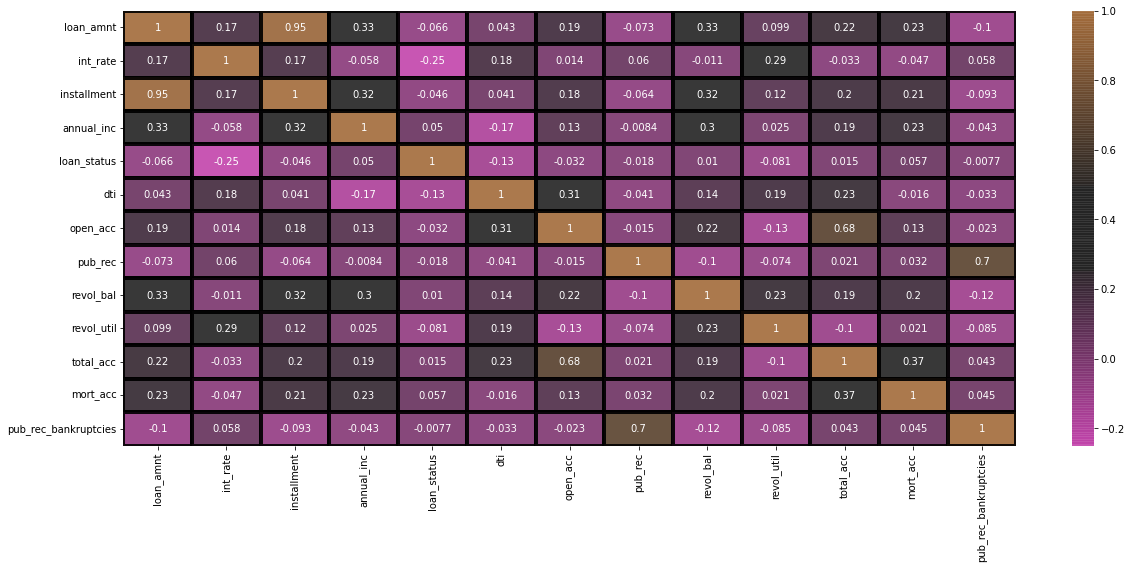

In [ ]:
df_copy = df.copy(deep=True)
df_copy['loan_status'] = df_copy['loan_status'].astype("category").cat.codes
plt.figure(figsize=(20, 8))

# reference - https://towardsdatascience.com/all-about-heatmaps-bb7d97f099d7
cmap = sns.diverging_palette(320, 40, sep=50, as_cmap=True, center="dark", n=10)
kwargs = {'alpha':.9,'linewidth':3, 'linecolor':'k','rasterized':False, 'edgecolor':'w', 'capstyle':'projecting',}


sns.heatmap(df_copy.corr(), annot=True, cmap=cmap, **kwargs)
plt.show()

##<font color="red" face="georgia">Observations</font>

1. The correlation between loan amount and instalment is very high, i.e., 0.95.
2. There's no correlation between interest rate and open account.
3. There is a fair amount of correlation between total_acc and open_acc, and between pub_rec_bankruptcies and pub_rec.
4. There is no correlation between revol_util and mort_acc.
5. For loan status, there is a moderately negative correlation with the interest rate. Other features have almost no correlation.

#```Univariate Analysis (Graphical)```

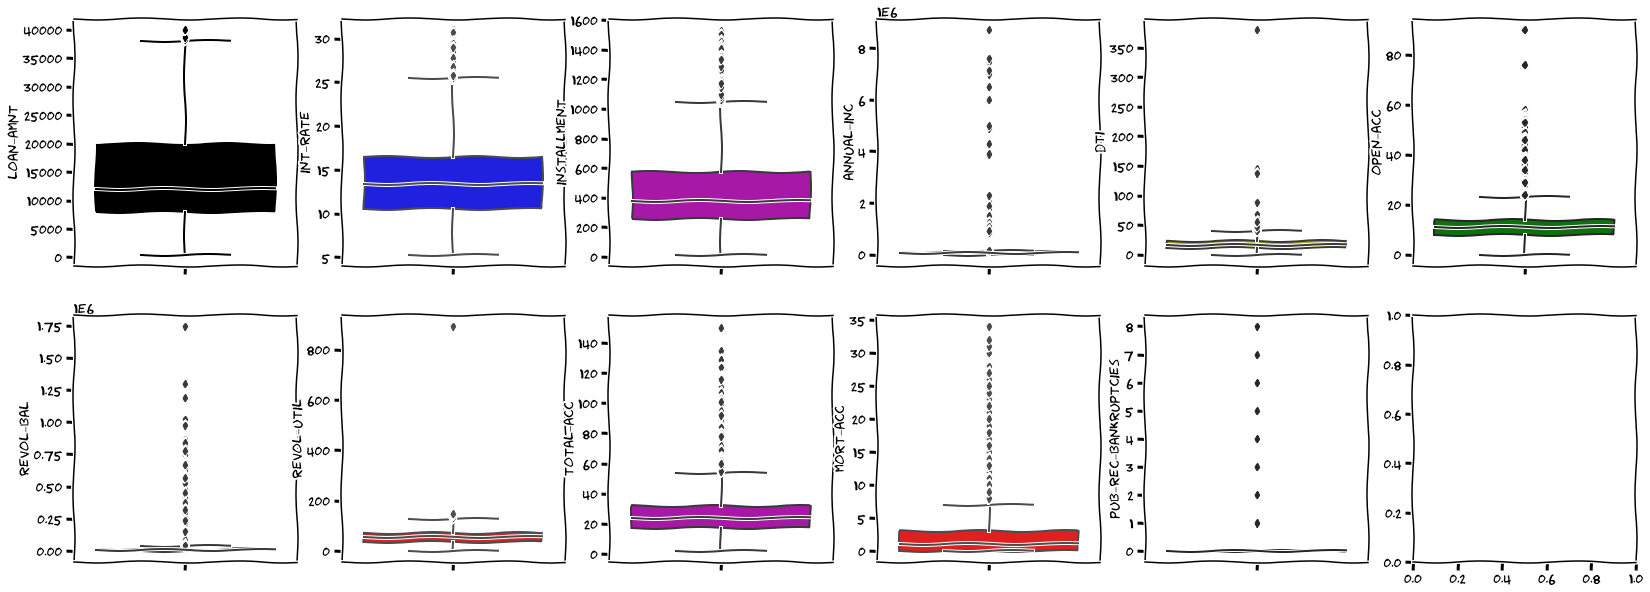

In [ ]:
numerical_columns = ['loan_amnt', 'int_rate', 'installment', 
                     'annual_inc', 'dti',
                     'open_acc', 'revol_bal', 'revol_util', 'total_acc',
                     'mort_acc', 'pub_rec_bankruptcies']

colors = ['r','g','b','y','c', 'm', 'k', 'brown']

with plt.xkcd():
  fig, ax = plt.subplots(2, 6, figsize=(28, 10))
  axes = ax.ravel()
  for index, feature in enumerate(numerical_columns):
    number = np.random.randint(0, len(colors))
    sns.boxplot(data=df, y=feature, ax=axes[index], color=colors[number])  

##<font color="red" face="georgia">Observations</font>

1. loan_amnt: There are a few outliers present in the loan amount that are also in the upper IQR.
2. int_rate: The interest rate is roughly lying between 10 and 17.5%, while there are outliers present in the upper IQR.
3. installment: The instalment amount ranges between 300 and 600, with outliers in the upper IQR beginning at 1100.
4. annual_inc: There is a lot of disparity among the data points, contributing majorly to outliers.
5. dti: The distribution of data in dti is shallow. while the vast majority of data points are anomalies
6. open_acc: Same as dti
7. revol_bal: same as annual_inc.
8. revol_util: The distribution is the same as dti, but the outliers are very few, and those are in the upper IQR.
9. total_acc: The total_acc distribution is roughly lying between 20 and 30, while there are outliers present in the upper IQR.
10. mort_acc: The data points are lying in the range of 0-4, while there are a lot of outliers present in the upper IQR.
11. pub_rec_bankruptcies: same as annual_inc.

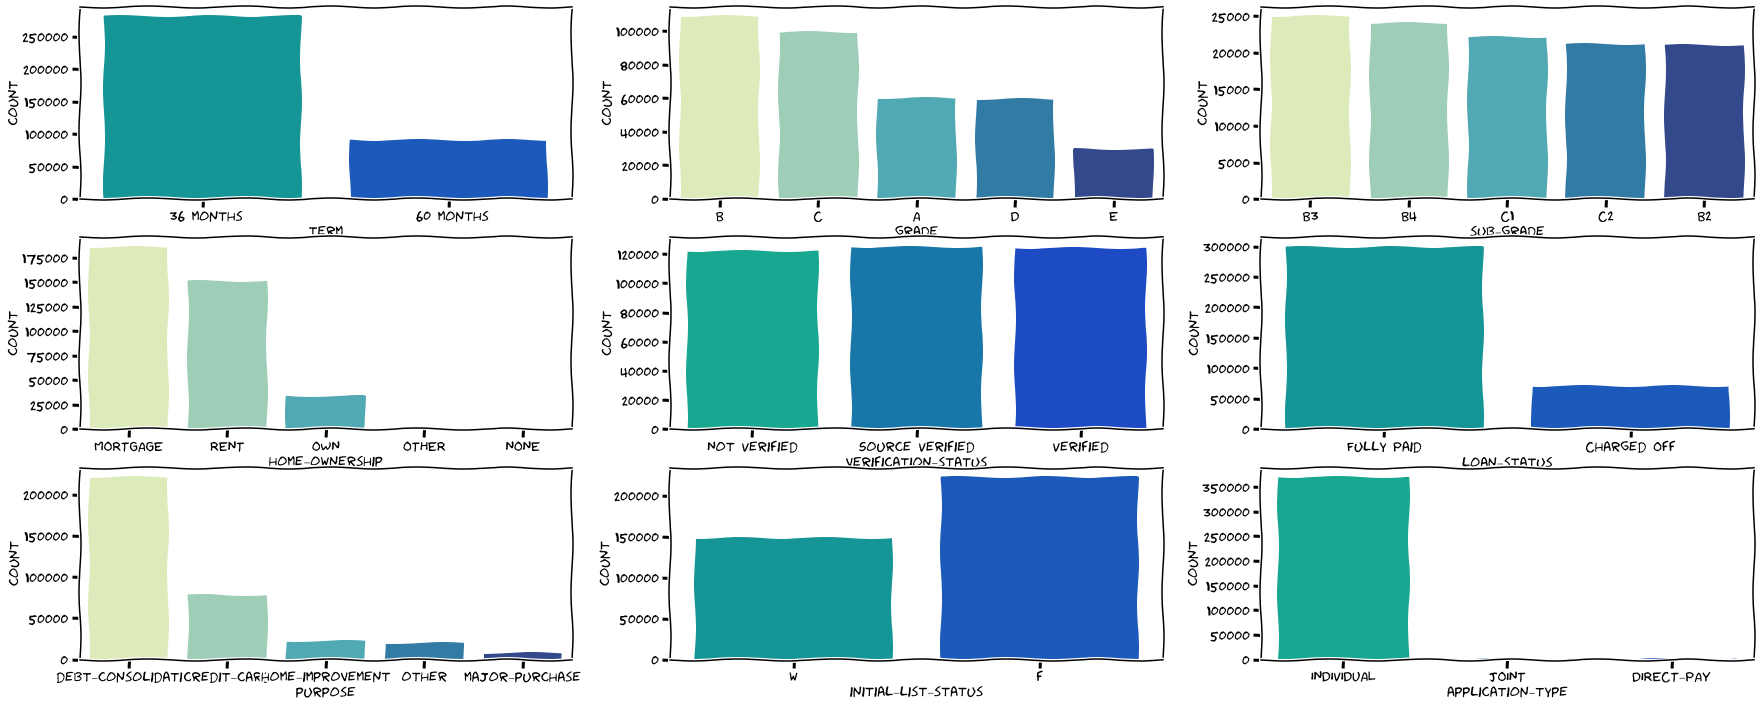

In [ ]:
cat_columns = ['term', 'grade', 'sub_grade', 'home_ownership', 
               'verification_status', 'loan_status', 'purpose', 
               'initial_list_status', 'application_type']

colors = ['r','g','b','y','c', 'm', 'k', 'brown']
# sns.countplot(data=tv_duration, y='duration', order=tv_duration['duration'].value_counts().index[:10], palette="YlGnBu")
with plt.xkcd():
  fig, ax = plt.subplots(3, 3, figsize=(30, 12))
  axes = ax.ravel()
  for index, feature in enumerate(cat_columns):
    if len(df[feature].unique()) > 5:
      sns.countplot(data=df, x=feature, order=df[feature].value_counts().index[:5], palette="YlGnBu", ax=axes[index])
    else:
      sns.countplot(data=df, x=feature, ax=axes[index], palette="winter_r")  

##<font color="red" face="georgia">Observations</font>

1. term: The majority of the loan terms consist of 36 months.
2. grade: The majority of the loans are considered B and C grades, followed by D and A, respectively.
3. sub_grade: B3 and B4 subgrades are the most common among all the subgrades.
4. home_ownership: Most of the loan applicants have home ownership as a mortgage, followed by rentals.
5. verification_status: All three statuses have nearly identical distributions.
6. loan_status: There is a huge imbalance in the dataset.
7. purpose: Repayment of existing debt is the most common objective of taking a loan.
8. initial_list_status: There can be more "F" statuses than "W" statuses.
10. application_type: Almost all the loan applicants are individuals.



#```Bivariate Analysis```

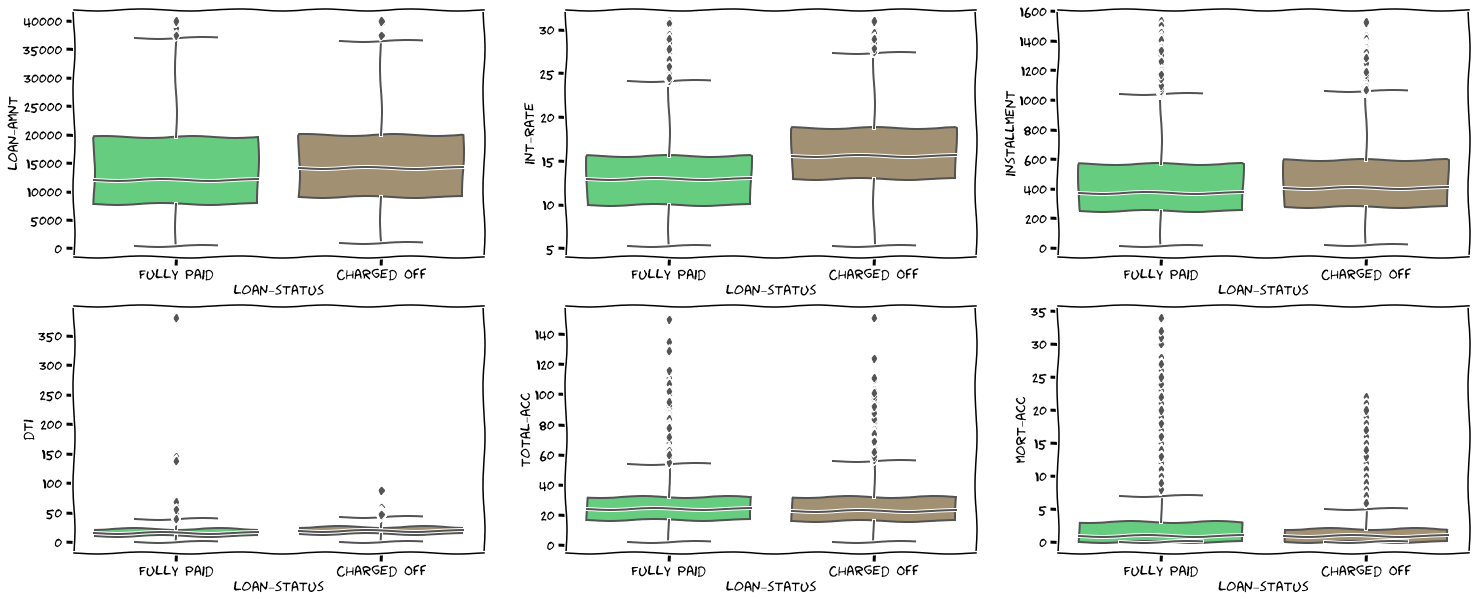

In [ ]:
columns = ['loan_amnt', 'int_rate', 'installment', 'dti', 'total_acc', 'mort_acc']
with plt.xkcd():
  fig, ax = plt.subplots(2, 3, figsize=(25, 10))
  axes = ax.ravel()
  for index, column in enumerate(columns):
    sns.boxplot(data=df, y=column, x="loan_status", ax=axes[index], palette="terrain")

##<font color="red" face="georgia">Observations</font>

1. loan_amnt vs. loan_status: The loan amount's distribution is nearly identical for both statutes, with outliers lying in the upper IQR.
2. int_rate vs. loan_status: The I.R. for the charged-off status started with a higher rate. The fully paid status is in the $50^{th}$ percentile, while the charged-off status is in the $25^{th}$ percentile.
3. instalment vs. loan_status: The installment's distribution is nearly identical for both the statuses.
4. dti vs. loan_status: The dti's distribution is nearly identical for both statuses.
5. total_acc vs. loan_status: The total_acc's distribution is nearly identical for both statuses.
6. mort_acc vs. loan_status: The size of a distribution fully paid is larger than a charge-off status.

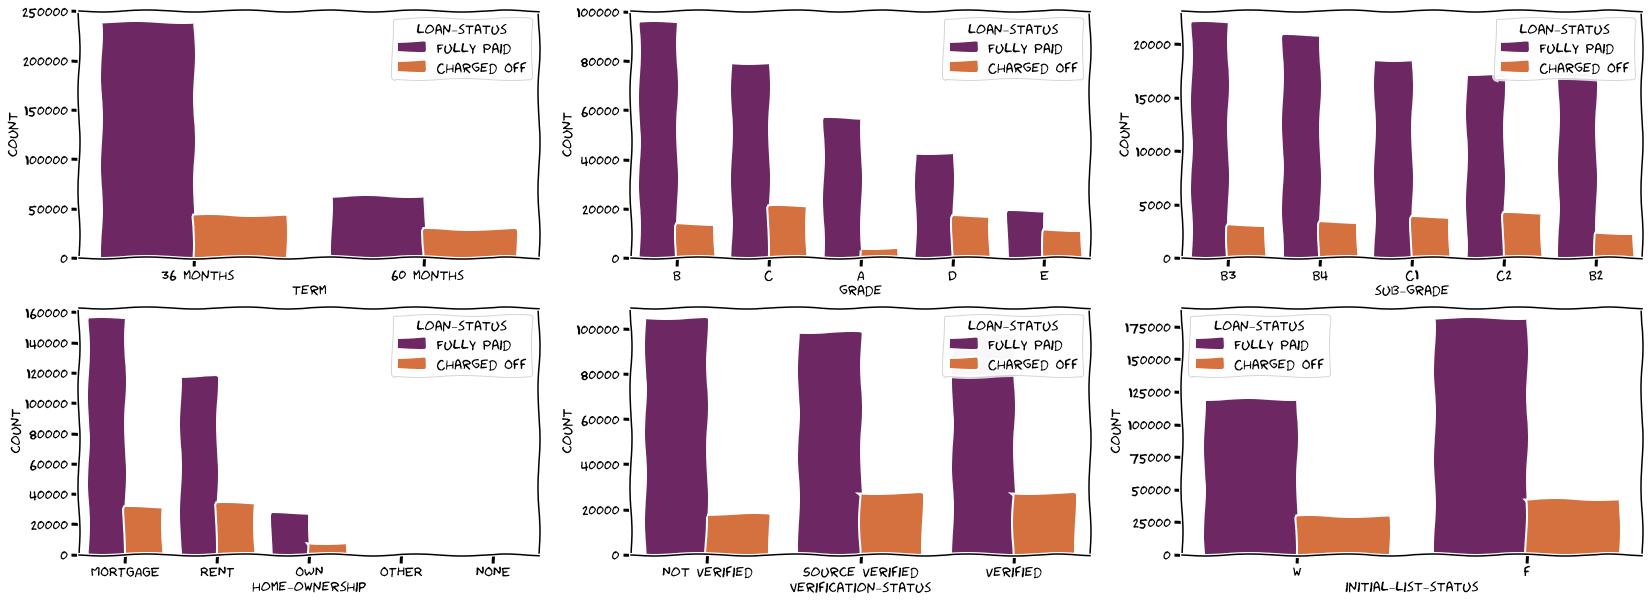

In [ ]:
columns = ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'initial_list_status']
with plt.xkcd():
  fig, ax = plt.subplots(2, 3, figsize=(28, 10))
  axes = ax.ravel()
  for index, column in enumerate(columns):
    if len(df[column].unique()) > 5:
      sns.countplot(data=df, x=column, hue="loan_status", order=df[column].value_counts().index[:5], ax=axes[index], palette="inferno")
    else:
      sns.countplot(data=df, x=column, hue="loan_status", ax=axes[index], palette="inferno")

##<font color="red" face="georgia">Observations</font>

1. loan_status vs. term: Roughly 90% of data points belong to 36 months of tenure with fully paid loan status.
2. loan_status vs. grade: The charged-off distribution is nearly identical for grades B and E. In grade E, the fully paid status is the lowest.
3. loan status vs. subgrade: The charged-off distribution for grades B3 and B4 is nearly identical.
4. loan status vs. home ownership: The charged-off distribution for rent and mortgage properties is nearly identical.
5. Loan Status vs. Verification Status: The charged off distribution for verified and source verified is nearly identical. While the fully paid status is nearly identical for all the statues,
6. loan_status vs. initial_list_status: The charged-off and fully-paid distribution for "W" and "F" is nearly identical.

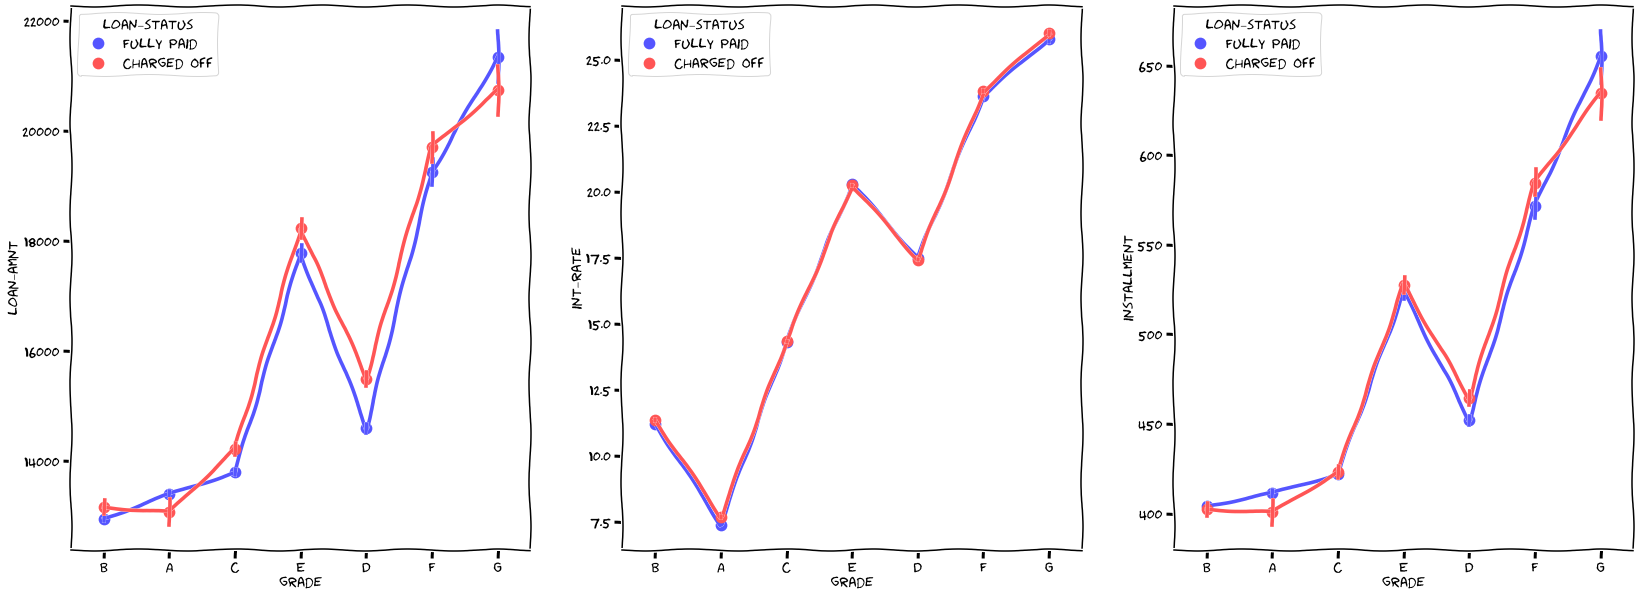

In [ ]:
columns = ['loan_amnt', 'int_rate', 'installment']
with plt.xkcd():
  fig, ax = plt.subplots(1, 3, figsize=(28, 10))
  axes = ax.ravel()
  for index, column in enumerate(columns):
    sns.pointplot(x="grade", y=column, hue="loan_status", data=df, palette="seismic", ax=axes[index])

##<font color="red" face="georgia">Observations</font>

1. loan_amnt: There is a sharp increase in the loan amount from grades A and C and a sharp decrease from E and D. Again, a significant increase from D and F.
2. int_rate: There is a sharp increase in interest rate from A to C to E.
3. installment: There is a sharp increase in instalment from C to E and a sharp decline from E to D.


#```Outlier Handling```

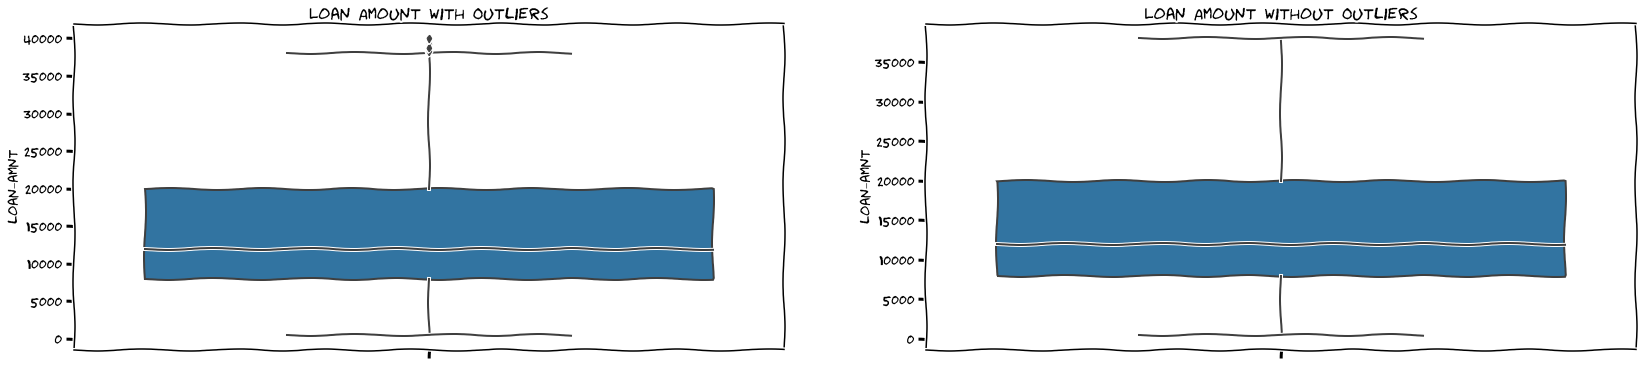

In [ ]:
p99_95, p0 = np.percentile(df['loan_amnt'].values, [99.951, 0])

df_outlier_treatment = df.copy()
df_outlier_treatment['loan_amnt'] = np.clip(df_outlier_treatment['loan_amnt'].values, p0, p99_95)

with plt.xkcd():
  fig, ax = plt.subplots(1, 2, figsize=(28, 6))
  axes = ax.ravel()    
  sns.boxplot(data=df, y="loan_amnt", ax=axes[0])
  axes[0].set_title("Loan Amount with Outliers")

  sns.boxplot(data=df_outlier_treatment, y="loan_amnt", ax=axes[1])
  axes[1].set_title("Loan Amount without Outliers")
  plt.show()

df['loan_amnt'] = np.clip(df['loan_amnt'].values, p0, p99_95)

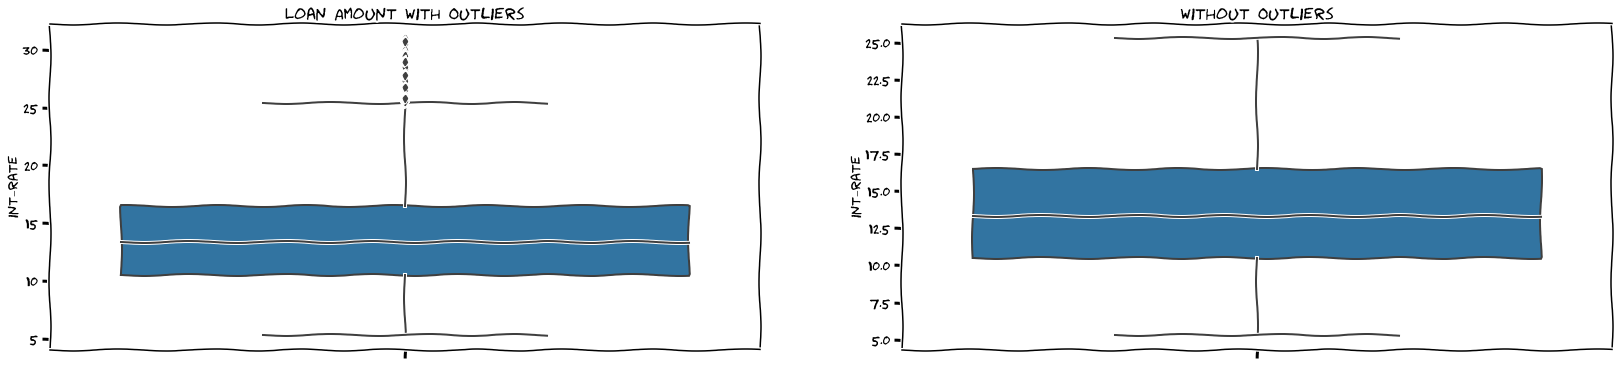

In [ ]:
p99, p0 = np.percentile(df['int_rate'].values, [99, 0])

df_outlier_treatment = df.copy()
df_outlier_treatment['int_rate'] = np.clip(df_outlier_treatment['int_rate'].values, p0, p99)

with plt.xkcd():
  fig, ax = plt.subplots(1, 2, figsize=(28, 6))
  axes = ax.ravel()    
  sns.boxplot(data=df, y="int_rate", ax=axes[0])
  axes[0].set_title("Loan Amount with Outliers")

  sns.boxplot(data=df_outlier_treatment, y="int_rate", ax=axes[1])
  axes[1].set_title("without Outliers")
  plt.show()

df['int_rate'] = np.clip(df['int_rate'].values, p0, p99)

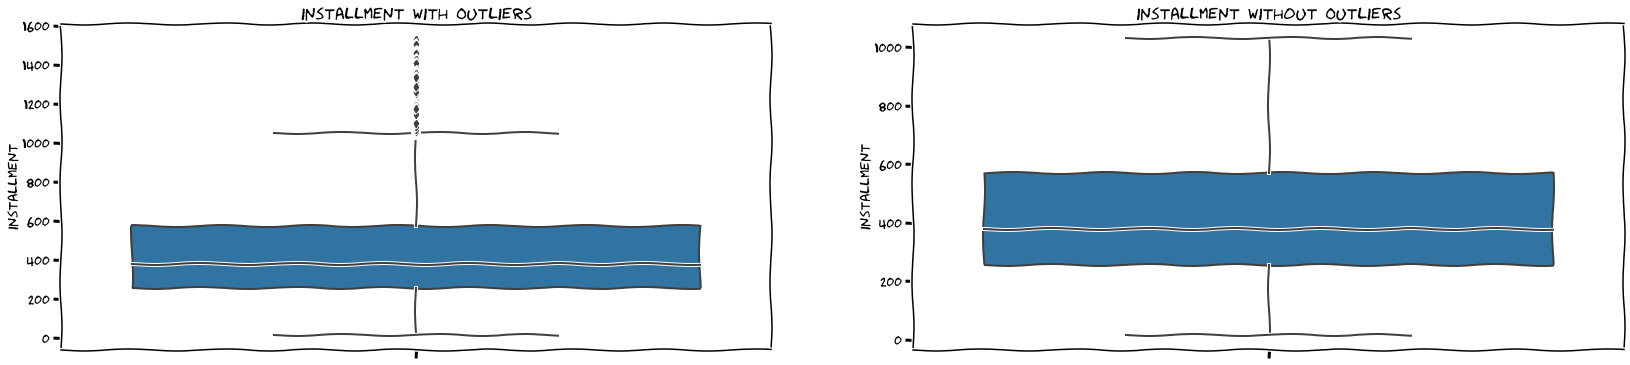

In [ ]:
p97, p0 = np.percentile(df['installment'].values, [97, 0])

df_outlier_treatment = df.copy()
df_outlier_treatment['installment'] = np.clip(df_outlier_treatment['installment'].values, p0, p97)

with plt.xkcd():
  fig, ax = plt.subplots(1, 2, figsize=(28, 6))
  axes = ax.ravel()    
  sns.boxplot(data=df, y="installment", ax=axes[0])
  axes[0].set_title("installment with Outliers")

  sns.boxplot(data=df_outlier_treatment, y="installment", ax=axes[1])
  axes[1].set_title("installment without Outliers")
  plt.show()

df['installment'] = np.clip(df['installment'].values, p0, p97)

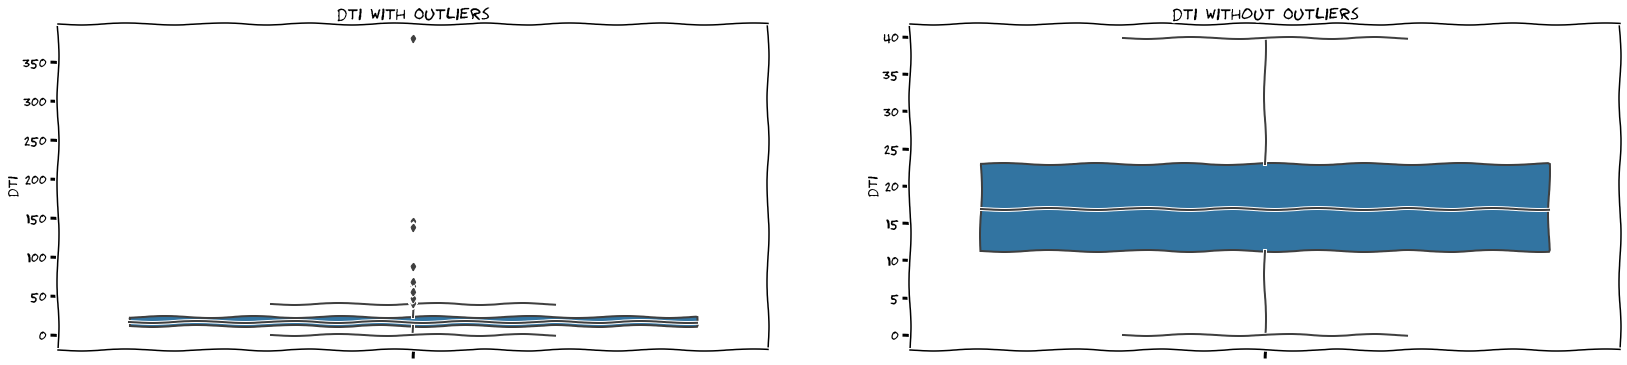

In [ ]:
p99_9, p0 = np.percentile(df['dti'].values, [99.9, 0])

df_outlier_treatment = df.copy()
df_outlier_treatment['dti'] = np.clip(df_outlier_treatment['dti'].values, p0, p99_9)

with plt.xkcd():
  fig, ax = plt.subplots(1, 2, figsize=(28, 6))
  axes = ax.ravel()    
  sns.boxplot(data=df, y="dti", ax=axes[0])
  axes[0].set_title("dti with Outliers")

  sns.boxplot(data=df_outlier_treatment, y="dti", ax=axes[1])
  axes[1].set_title("dti without Outliers")
  plt.show()

df['dti'] = np.clip(df['dti'].values, p0, p99_9)

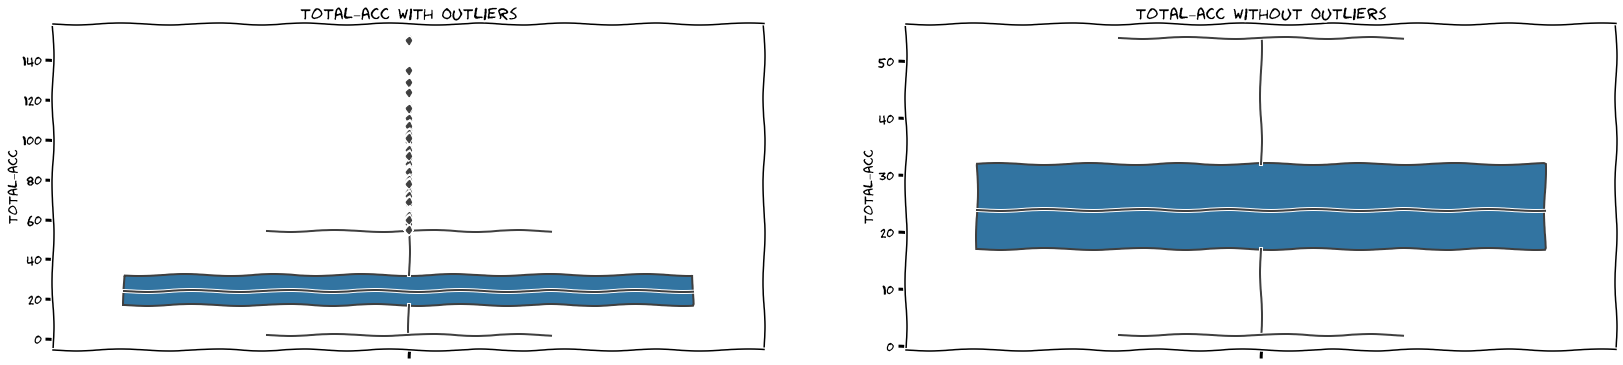

In [ ]:
p97_8, p0 = np.percentile(df['total_acc'].values, [97.8, 0])

df_outlier_treatment = df.copy()
df_outlier_treatment['total_acc'] = np.clip(df_outlier_treatment['total_acc'].values, p0, p97_8)

with plt.xkcd():
  fig, ax = plt.subplots(1, 2, figsize=(28, 6))
  axes = ax.ravel()    
  sns.boxplot(data=df, y="total_acc", ax=axes[0])
  axes[0].set_title("total_acc with Outliers")

  sns.boxplot(data=df_outlier_treatment, y="total_acc", ax=axes[1])
  axes[1].set_title("total_acc without Outliers")
  plt.show()

df['total_acc'] = np.clip(df['total_acc'].values, p0, p97_8)

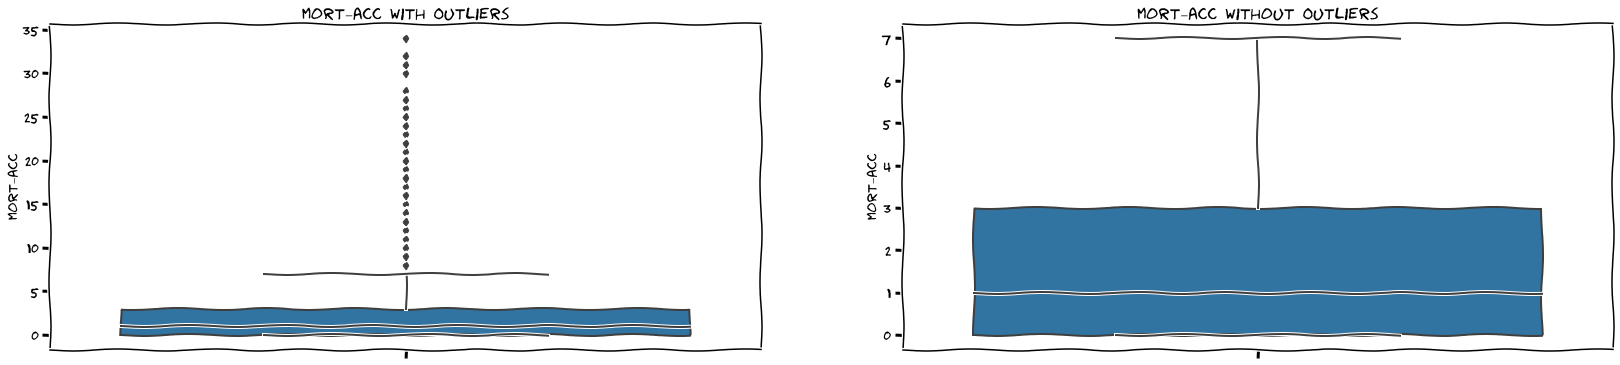

In [ ]:
p98_2, p0 = np.percentile(df['mort_acc'].values, [98.2, 0])

df_outlier_treatment = df.copy()
df_outlier_treatment['mort_acc'] = np.clip(df_outlier_treatment['mort_acc'].values, p0, p98_2)

with plt.xkcd():
  fig, ax = plt.subplots(1, 2, figsize=(28, 6))
  axes = ax.ravel()    
  sns.boxplot(data=df, y="mort_acc", ax=axes[0])
  axes[0].set_title("mort_acc with Outliers")

  sns.boxplot(data=df_outlier_treatment, y="mort_acc", ax=axes[1])
  axes[1].set_title("mort_acc without Outliers")
  plt.show()

df['mort_acc'] = np.clip(df['mort_acc'].values, p0, p98_2)

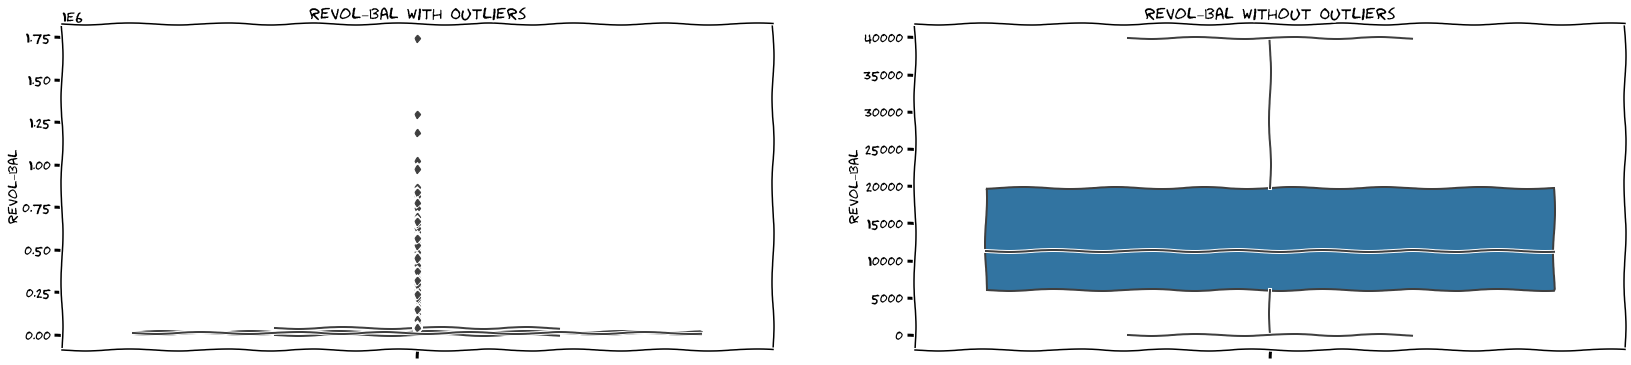

In [ ]:
p94_5, p0 = np.percentile(df['revol_bal'].values, [94.5, 0])

df_outlier_treatment = df.copy()
df_outlier_treatment['revol_bal'] = np.clip(df_outlier_treatment['revol_bal'].values, p0, p94_5)

with plt.xkcd():
  fig, ax = plt.subplots(1, 2, figsize=(28, 6))
  axes = ax.ravel()    
  sns.boxplot(data=df, y="revol_bal", ax=axes[0])
  axes[0].set_title("revol_bal with Outliers")

  sns.boxplot(data=df_outlier_treatment, y="revol_bal", ax=axes[1])
  axes[1].set_title("revol_bal without Outliers")
  plt.show()


df['revol_bal'] = np.clip(df['revol_bal'].values, p0, p98_2)

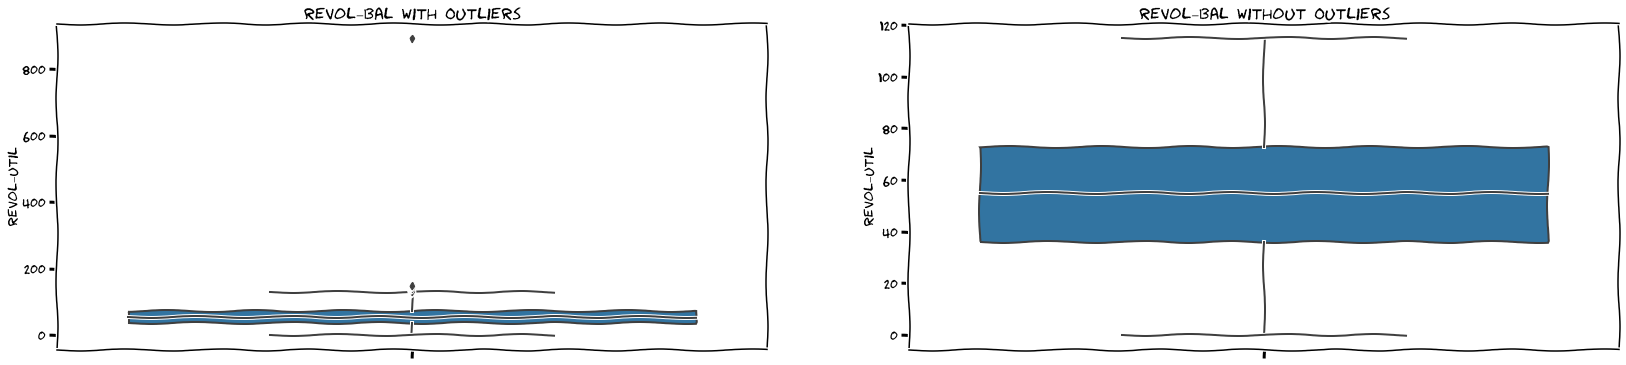

In [ ]:
# revol_util
p99_9, p0 = np.percentile(df['revol_util'].values, [99.99, 0])

df_outlier_treatment = df.copy()
df_outlier_treatment['revol_util'] = np.clip(df_outlier_treatment['revol_util'].values, p0, p99_9)

with plt.xkcd():
  fig, ax = plt.subplots(1, 2, figsize=(28, 6))
  axes = ax.ravel()    
  sns.boxplot(data=df, y="revol_util", ax=axes[0])
  axes[0].set_title("revol_bal with Outliers")

  sns.boxplot(data=df_outlier_treatment, y="revol_util", ax=axes[1])
  axes[1].set_title("revol_bal without Outliers")
  plt.show()


df['revol_bal'] = np.clip(df['revol_bal'].values, p0, p99_9)

#```Feature Engineering```

In [ ]:
df_copy = df.copy()
df_copy['pub_rec'] = [1 if pub_rec > 1 else 0 for pub_rec in df['pub_rec'].values]
df_copy['mort_acc'] = [1 if mort_acc > 1 else 0 for mort_acc in df['mort_acc'].values]
df_copy['pub_rec_bankruptcies'] = [1 if pub_rec_bankruptcies > 1 else 0 for pub_rec_bankruptcies in df['pub_rec_bankruptcies'].values]

In [ ]:
!python -m pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 4.0 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, RobustScaler
from sklearn.compose import make_column_transformer
from category_encoders.woe import WOEEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from category_encoders.glmm import GLMMEncoder
from category_encoders.quantile_encoder import SummaryEncoder
from category_encoders.cat_boost import CatBoostEncoder
from sklearn.utils.class_weight import compute_class_weight

#```Train & Test Split```

In [ ]:
features = df_copy.drop(['loan_status'], axis=1)
label = df_copy['loan_status']
label.replace({"Fully Paid":1, "Charged Off": 0}, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(features, label, stratify=label, test_size=0.25, random_state=101)

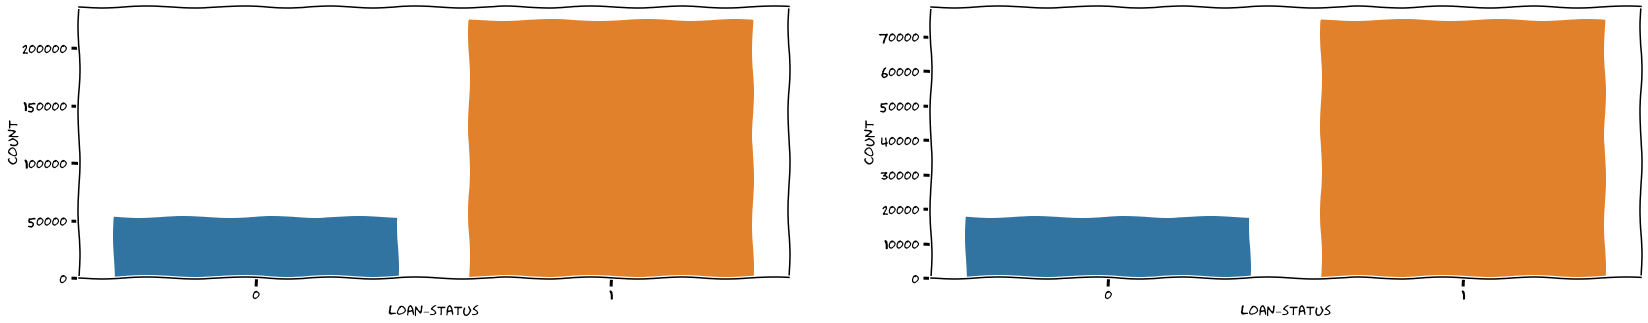

In [ ]:
with plt.xkcd():
  fig, ax = plt.subplots(1, 2, figsize=(28, 5))
  axes = ax.ravel()

  sns.countplot(x=y_train, ax=axes[0])
  sns.countplot(x=y_test, ax=axes[1])
  plt.show()

##<font color="red" face="georgia">Observations</font>

1. We can see that the ratio of fully paid to charged-off is greater than 1, indicating a huge imbalance in the dataset.

2. To restore the "imbalance-ness", we will be using SMOTE (Synthetic Minority Over-sampling Technique)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
numerical_columns = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
                     'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc']
categorical_columns = ['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 
                       'title', 'initial_list_status', 'application_type', 
                       'mort_acc', 'pub_rec_bankruptcies']

#```Pre-Processing (StandardScaler + WOE Encoding)```

References: 
1. https://contrib.scikit-learn.org/category_encoders/woe.html
2. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html


In [ ]:
transformer = make_column_transformer(
    (StandardScaler(), numerical_columns),
    (WOEEncoder(), categorical_columns)
)

X_train_preprocessed = transformer.fit_transform(X_train, y_train)
X_test_preprocessed = transformer.transform(X_test)

X_train_preprocessed = pd.DataFrame(X_train_preprocessed, columns=numerical_columns + categorical_columns)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed, columns=numerical_columns + categorical_columns)

In [ ]:
sm = SMOTE(random_state=42, n_jobs=-1)
X_train_res, y_train_res = sm.fit_resample(X_train_preprocessed.values, y_train.values)
X_test_res, y_test_res = sm.fit_resample(X_test_preprocessed.values, y_test.values)

X_train_res = pd.DataFrame(X_train_res, columns=numerical_columns + categorical_columns)
X_test_res = pd.DataFrame(X_test_res, columns=numerical_columns + categorical_columns)

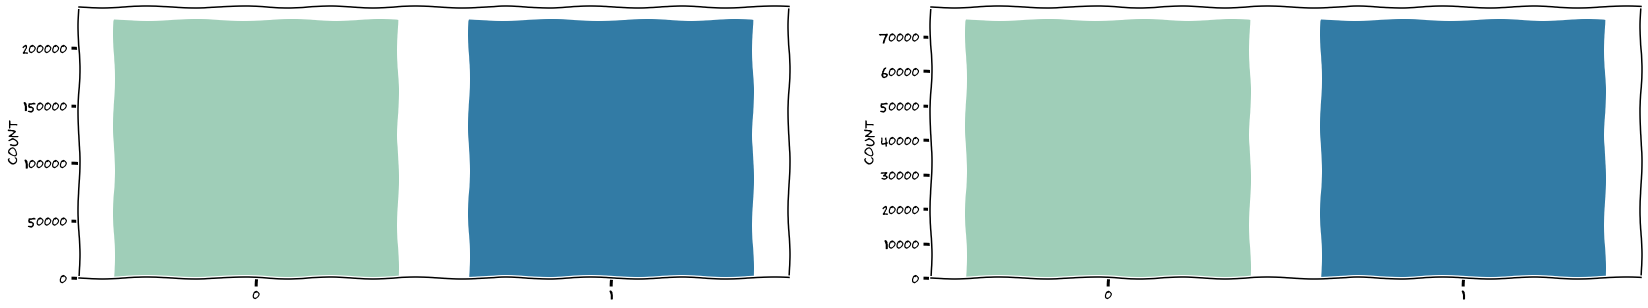

In [ ]:
with plt.xkcd():
  fig, ax = plt.subplots(1, 2, figsize=(28, 5))
  axes = ax.ravel()

  sns.countplot(x=y_train_res, ax=axes[0], palette="YlGnBu")
  sns.countplot(x=y_test_res, ax=axes[1], palette="YlGnBu")
  plt.show()

##<font color="red" face="georgia">Observations</font>

We can see that after using SMOTE, the ratio between fully paid and charged-off is equal to 1.

In [ ]:
lr = LogisticRegression(max_iter=500)
lr.fit(X_train_res, y_train_res)

LogisticRegression(max_iter=500)

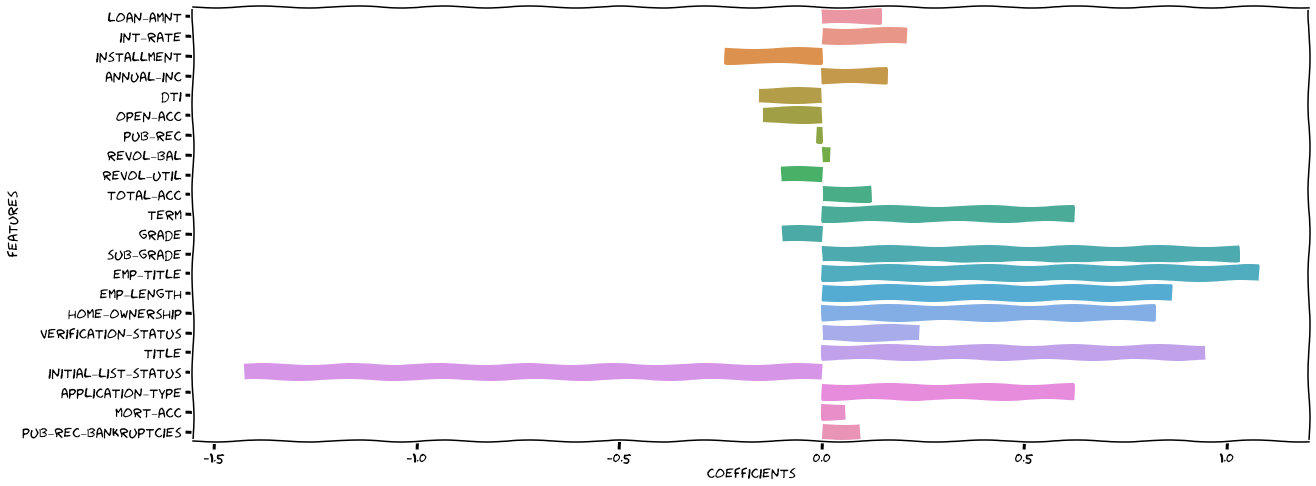

In [ ]:
feature_importance = pd.DataFrame(data={
    "features": lr.feature_names_in_,
    "coefficients": np.round(lr.coef_.flatten(), 3)
})
with plt.xkcd():
  plt.figure(figsize=(20, 8))
  sns.barplot(data=feature_importance, y="features", x="coefficients")
  plt.show()
  # fig = px.bar(feature_importance, x='coefficients', y='features')
  # fig.show()

##<font color="red" face="georgia">Observations</font>

After training the model with StandardScaler and Weight of Evidence (WOE) for numerical and categorical columns, we can see that ```initial_list_status``` followed by ```emp_title``` and ```sub_grade``` are the dominant features for deciding ```loan status```.

##```Shap (Model Interpretability)```

In [ ]:
!pip3 install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 13.8 MB/s eta 0:00:00


In [ ]:
import shap
shap.initjs()

In [ ]:
# explainer = shap.Explainer(lr, X_train_res, feature_names=lr.feature_names_in_)
# shap_values = explainer(X_test_res)
# explainer = shap.LinearExplainer(lr, data=X_train_res, feature_perturbation="interventional", feature_names=lr.feature_names_in_)
explainer = shap.LinearExplainer(lr, X_train_res[:], feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test_res[:10000])

The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


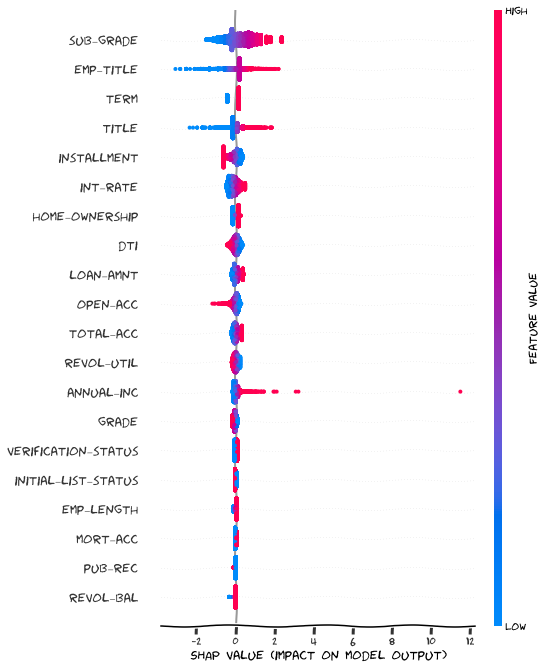

In [ ]:
with plt.xkcd():
  plt.figure(figsize=(20, 8))
  shap.summary_plot(shap_values, X_test_res.values[:10000], feature_names=lr.feature_names_in_, show="False")

##<font color="red" face="georgia">Observations</font>

From the summary plot, we can conclude that ```sub_grade```, ```emp_title```, ```term```, ```title```, and ```instalment``` are the top 5 *important features* for deciding loan status.

##```ANOVA```

$H_{0}$: The means of all groups are equal, i.e., there is no impact on features on the target variable.

$H_{a}$: At least one mean of the groups is different, i.e., there is an impact on features of the target variable.

In [ ]:
from sklearn.feature_selection import f_classif, SelectKBest

In [ ]:
anova = SelectKBest(f_classif, k="all")
anova.fit(X_train_res, y_train_res)

SelectKBest(k='all')

In [ ]:
anova_feature_importance = pd.DataFrame(
    data={
        "features": anova.feature_names_in_,
        "p_value": anova.pvalues_
    }
)

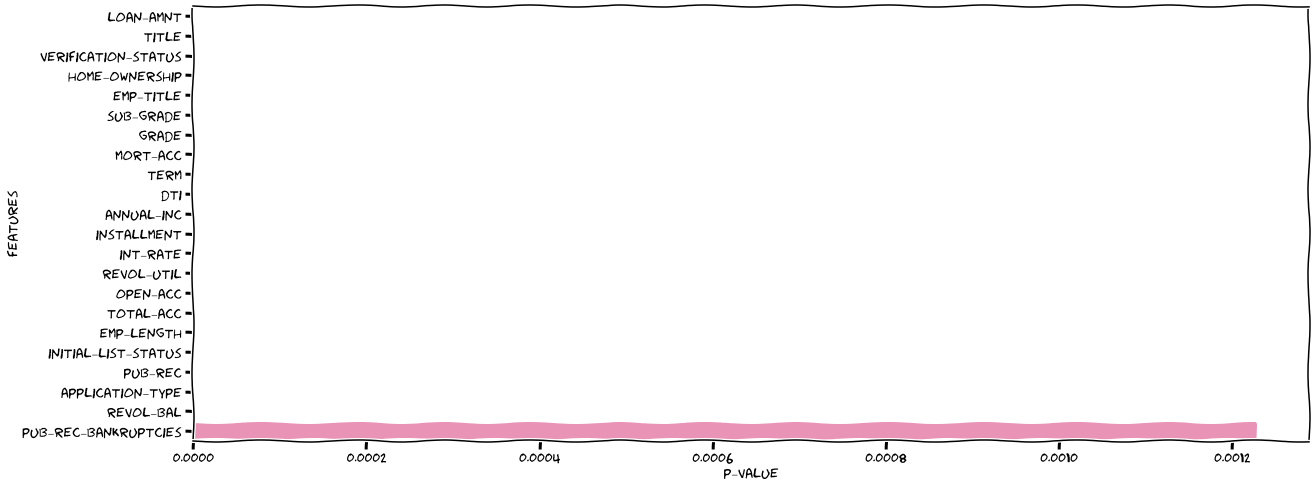

In [ ]:
anova_feature_importance.sort_values("p_value", ascending=True, inplace=True)
with plt.xkcd():
  plt.figure(figsize=(20, 8))
  sns.barplot(data=anova_feature_importance, y="features", x="p_value")
  plt.show()
# fig = px.bar(anova_feature_importance, x="p_value", y="features")
# fig.show()

In [ ]:
anova_feature_importance

,features,p_value
0,loan_amnt,0.000000e+00
17,title,0.000000e+00
16,verification_status,0.000000e+00
15,home_ownership,0.000000e+00
13,emp_title,0.000000e+00
12,sub_grade,0.000000e+00
11,grade,0.000000e+00
20,mort_acc,0.000000e+00
10,term,0.000000e+00
4,dti,0.000000e+00


##<font color="red" face="georgia">Observations</font>

From the ANOVA analysis, we can conclude that all the features are equally important for deciding loan status, as their p values are less than the usual 5% threshold τ.

##```Partial Dependence Plot```

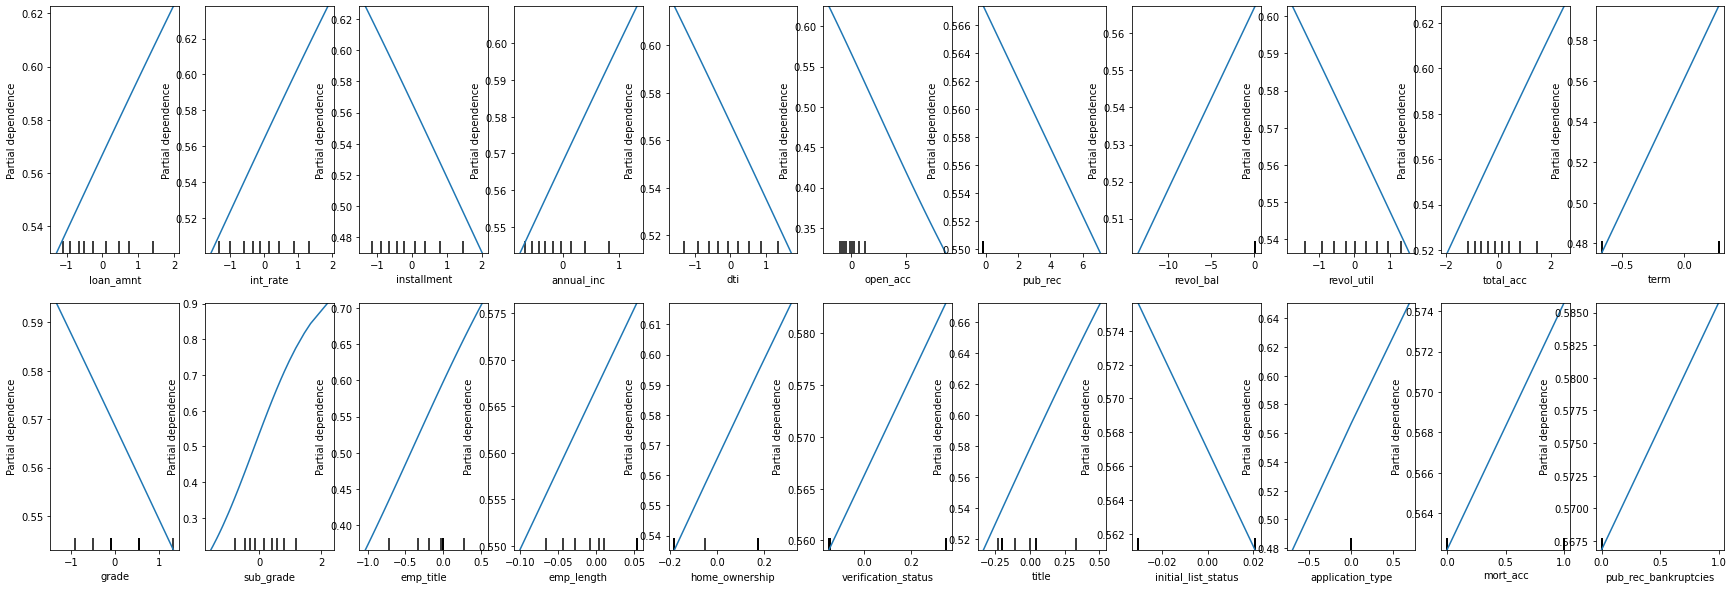

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
fig, ax = plt.subplots(2, 11, figsize=(30, 10))
axes = ax.ravel()
for index, column in enumerate(list(X_train_res.columns)):
  PartialDependenceDisplay.from_estimator(lr, X_train_res[:10000], [index], ax=axes[index])

##<font color="red" face="georgia">Observations</font>

1. According to the partial dependence plot, an increase in loan amount, interest rate, annual income, revol_bal, total_acc, term, application_type, mort_acc, pub_rec_bankruptcies employee title, employee length, and home ownership is linearly related to loan status probability.

2. Conversely, a decrease in installment, dti, open_acc, pub_rec, revol_util, initial_list_status is linearly related to loan-status probability.

In [ ]:
!pip3 install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc, classification_report
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

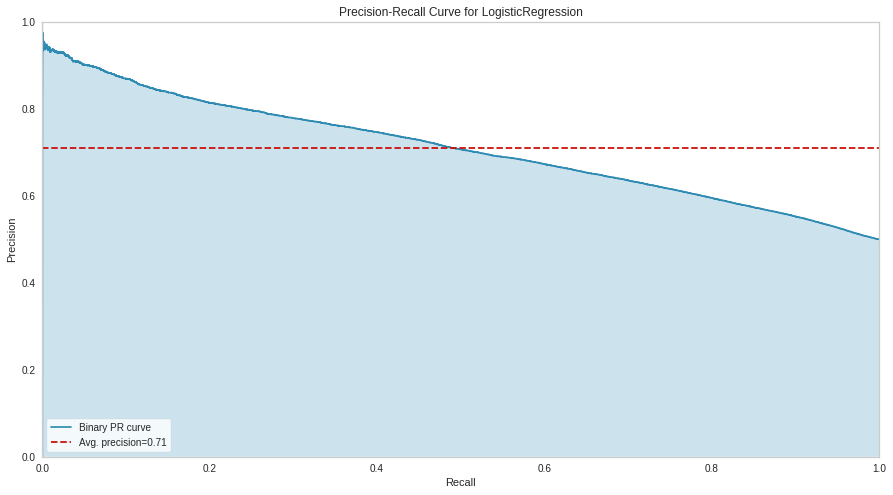

In [ ]:
# # Reference: https://plotly.com/python/roc-and-pr-curves/
# y_score = lr.predict_proba(X_test_res)[:, 1]
# # y_score = lr.predict_proba(X_test_preprocessed)[:, 1]

# precision, recall, thresholds = precision_recall_curve(y_test_res, y_score)
# precision, recall, thresholds = np.round(precision, 3), np.round(recall, 3), np.round(thresholds, 3)
# # precision, recall, thresholds = precision_recall_curve(y_test, y_score)
# # fpr, tpr, thresholds = roc_curve(y_test_res, y_score)
# fpr, tpr, thresholds = roc_curve(y_test_res, y_score)
# fpr, tpr, thresholds = np.round(fpr, 3), np.round(tpr, 3), np.round(thresholds, 3)

# fig = px.area(
#     x=recall, y=precision,
#     title=f'Precision-Recall Curve (AUC={auc(fpr, tpr):.4f})',
#     labels=dict(x='Recall', y='Precision'),
#     width=700, height=500
# )
# fig.add_shape(
#     type='line', line=dict(dash='dash'),
#     x0=0, x1=1, y0=1, y1=0
# )
# fig.update_yaxes(scaleanchor="x", scaleratio=1)
# fig.update_xaxes(constrain='domain')

# fig.show()


# from sklearn.metrics import PrecisionRecallDisplay

# plt.figure(figsize=(20, 8))
# display = PrecisionRecallDisplay.from_estimator(
#     lr, X_test_res, y_test_res, name="LR"
# )
# # _ = display.ax_.set_title("2-class Precision-Recall curve")
# plt.show()

plt.figure(figsize=(15, 8))
viz = PrecisionRecallCurve(LogisticRegression(max_iter=500))
viz.fit(X_train_res, y_train_res)
viz.score(X_test_res, y_test_res)
viz.show()
plt.show()

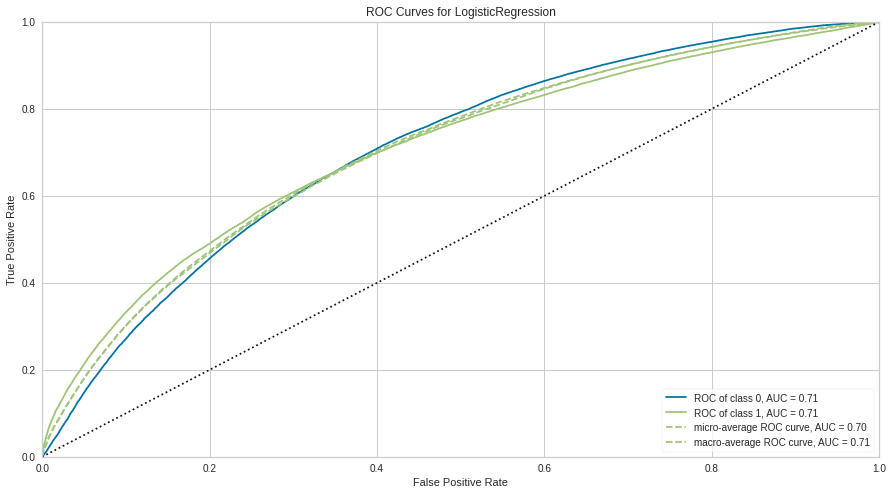

In [ ]:
# import plotly.express as px
# y_score = lr.predict_proba(X_test_res)[:, 1]
# # y_score = lr.predict_proba(X_test_preprocessed)[:, 1]

# # fpr, tpr, thresholds = roc_curve(y_test_res, y_score)
# fpr, tpr, thresholds = roc_curve(y_test_res, y_score)
# fpr, tpr, thresholds = np.round(fpr, 3), np.round(tpr, 3), np.round(thresholds, 3)

# fig = px.area(
#     x=fpr, y=tpr,
#     title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
#     labels=dict(x='False Positive Rate', y='True Positive Rate'),
#     width=700, height=500
# )
# fig.add_shape(
#     type='line', line=dict(dash='dash'),
#     x0=0, x1=1, y0=0, y1=1
# )

# fig.update_yaxes(scaleanchor="x", scaleratio=1)
# fig.update_xaxes(constrain='domain')
# fig.show()

plt.figure(figsize=(15, 8))
model = LogisticRegression(max_iter=500)
visualizer = ROCAUC(model, classes=list(np.unique(y_train_res)))

visualizer.fit(X_train_res, y_train_res)        # Fit the training data to the visualizer
visualizer.score(X_test_res, y_test_res)        # Evaluate the model on the test data
visualizer.show()
plt.show()

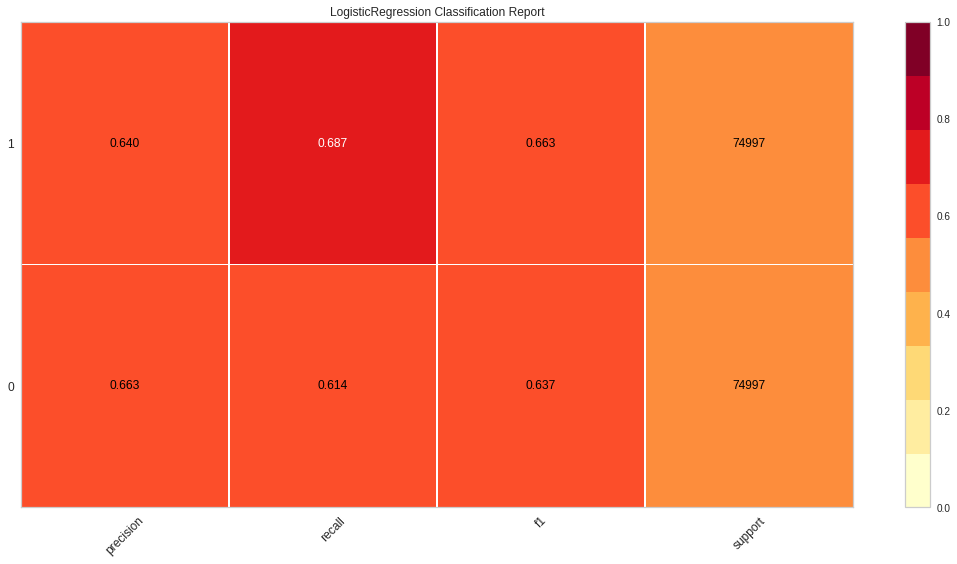

In [ ]:
# TEST SET - 
plt.figure(figsize=(15, 8))
visualizer = ClassificationReport(LogisticRegression(max_iter=500), classes=list(np.unique(y_train_res)), support=True)

visualizer.fit(X_train_res, y_train_res)        # Fit the visualizer and the model
visualizer.score(X_test_res, y_test_res)        # Evaluate the model on the test data
visualizer.show()
plt.show()

##<font color="red" face="georgia">Observations</font>

1. ROC AUC: We are getting an AUC value of 0.7070, which is above 0.5, indicating that the model is performing better than the random classifier. As the threshold is increasing, we can see that the FPR and TPR are also increasing.
2. Precision-Recall Curve: From the graph, we can see that at precision of 0.98, we are getting recall of 0.002, which is at the minimum threshold, while at the maximum threshold, we are getting recall of 0.99 at precision of 0.50.
3. Classification Report: We can see that, for charged-off status, we are getting the precision value of 0.66 at a recall of 0.62. Similarly, we are getting 0.64 precision at 0.69 recall. We are getting accuracy of 0.65.

##<font color="red" face="georgia">Trade-off questions</font>

Q. How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it

Ans: From the coefficients, we can see that ```initial_status``` is a strong predictor, followed by ```emp_title``` and ```sub_grade``` and ```emp_length```, so using these features we can determine the real defaulters. Other factors include the impact of the recession on the loan applicant's job, whether they are prone to termination, count of family members, existing loans and their amounts, and so on. 

Q. Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone. 

Ans: Based on the applicants' job supply and demand, we can determine the NPAs. Based on the number of previous loans, and their payment status (how quickly they pay back their loans), credit score, etc., we can also determine NPAs.

##```Actionable Insights & Recommendations```

##<font color="red" face="georgia">Insights</font>

1. We can see that initial status plays a crucial role in determining the loan status of the applicant.
2. There is a strong linear relationship between loan amount and instalment rate.
3. The majority of the applicants' debt-to-income (DTI) ratio is huge, resulting in huge debts. The maximum DTI can be seen in grade D, followed by grade B. The maximum dti is nearly identical for A and C.
4. About 90% of loan applicants have opted for 36 months of loan tenure.
5. The highest number of bankruptcies can be found in grades D and F, followed by E and B.
6. Individuals with a mortgage and rental properties have the highest annual income.
7. The major purpose of the loan application is to repay the existing debt, followed by credit card bills, which are another debt.
8. Historically, 80% of the loans are fully paid off.

##<font color="red" face="georgia">Recommendations</font>

1. Before loan disbursement, the credit score and past loan payments of loan applicants should be checked. We can also look at the applicant's job status, as in the supply and demand of jobs in the future, so that loan can be disbursed appropriately.

2. Banks should focus less on unverified sources of income as they are more prone to unpaid loans.

3. Banks should increase the interest rates for those whose loan requests are least popular, as they might be unsecured loans.